<a href="https://github.com/victoresende19" rel="some text">![Foo](https://blog.nubank.com.br/wp-content/uploads/2019/03/golpes-cartao-credito.jpg)</a>

<h2 style="text-align:center">Pivitin's Banking - Fraudes<h2\>
<p style="text-align:center;font-size:13px;"></p>
   
<h2 style="text-align:center">Victor Augusto Souza Resende<h2\>
<p style="text-align:center;font-size:13px;">Autor</p>


## Sumário

    
- [1. Contexto](#1)<br>
    * [1.2 Problema - Criteiro de aceite](#12)<br>
- [2. Clusterização](#2)<br>
    * [2.1. Dendograma](#21)<br>
    * [2.2. Normalização dos dados](#22)<br>
    * [2.3. PCA - Redução de dimensionalidade ](#23)<br>
    * [2.1. HCA](#24)<br>
    * [2.1. DBSCAN](#25)<br>
- [3. Conclusão](#3)<br>

### Observação: 
Para uma melhor visualização, recomenda-se a utilização do software Jupyter Notebook do Anaconda para a visualização. Contém alguns textos em HTML/Markdown que podem não funcionar no Google Colab. 

## Contexto <a id="1"></a>

Um grande banco da América Latina que oferece cartões de crédito aos seu clientes desconfia que venham ocorrendo fraudes em algumas operações.

Para verificar isso, ela separou um conjunto de dados suspeitos e quer saber se é possível encontrar algum padrão neles onde é possível identificar operações parecidas entre si para então avaliar se existe de fato, dentro desses subconjuntos de dados, operações fraudulentas. 

Em resumo, ela contratou a Pivitin's Consulting para efetuar uma separação dos dados para então julgar quais são os casos mais prováveis de serem fraudes e quais os menos prováveis.

### Problema - Criteiro de aceite <a id="12"></a>

- Conseguir fazer a segmentação dos dados apresentados.
- Relatório demonstrando e explicando as análises de maneira clara.

<hr>

## Clusterização <a id="2"></a>

In [2]:
# manipulacao de dados
import pandas as pd
import numpy as np

# graficos
import matplotlib.pyplot as plt

# pre processamento
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# clusterizacao
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [3]:
df = pd.read_csv('fraud_credit_card.csv')

In [4]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15776156,0.63,31.14,4.37,1.70,5.30,3.63,1.11,0.29,0.26,0.98,0.34,1.92,143.26,294.28
1,15739548,0.64,29.74,3.65,1.68,5.21,3.59,0.65,0.22,0.18,0.17,0.34,1.90,159.65,107.46
2,15662854,0.67,26.40,1.98,1.63,5.52,3.73,-0.21,0.11,0.05,-1.45,0.38,1.86,209.95,-172.97
3,15687688,0.73,38.60,8.72,2.01,12.00,7.08,6.53,1.31,1.10,8.86,0.68,2.02,195.80,3326.46
4,15715750,0.76,39.02,9.06,2.05,13.38,7.79,7.32,1.47,1.22,9.88,0.76,2.03,221.08,3825.70


In [5]:
X = df.loc[:, df.columns != 'CustomerID']

Ao visualizar os dados disponibilizados percebe-se que não há informação sobre as variáveis. Dessa forma, deve-se encontrar quais dessas são as melhores, mesmo não havendo informações sobre tais. Pode-se concluir que trata-se de um problema não supervisionado, de maneira simples, quando não temos uma variável resposta. 

Portanto, para as análises será utilizado o PCA para a redução de dimensionalidade, isto é, reduzir a quantidade de variáveis de acordo com a transformação linear entre elas. Sendo assim, o principal uso desse algoritmo é reduzir a base de dados, que nesse caso contem variáveis sem nomeação, em um conjunto de dados mais enxuto que consiga responder o problema de negócio análisado.

### Dendograma <a id="21"></a>

A análise de dendograma é válida para verificar a quantidade de cluster que podem existir no conjunto de dados análisados. Dessa forma, deve-se avaliar as retas geradas pelo dendograma e decidir a quantidade de conjuntos que podem existir na base de dados. No exemplo abaixo utilizou-se o método Ward.

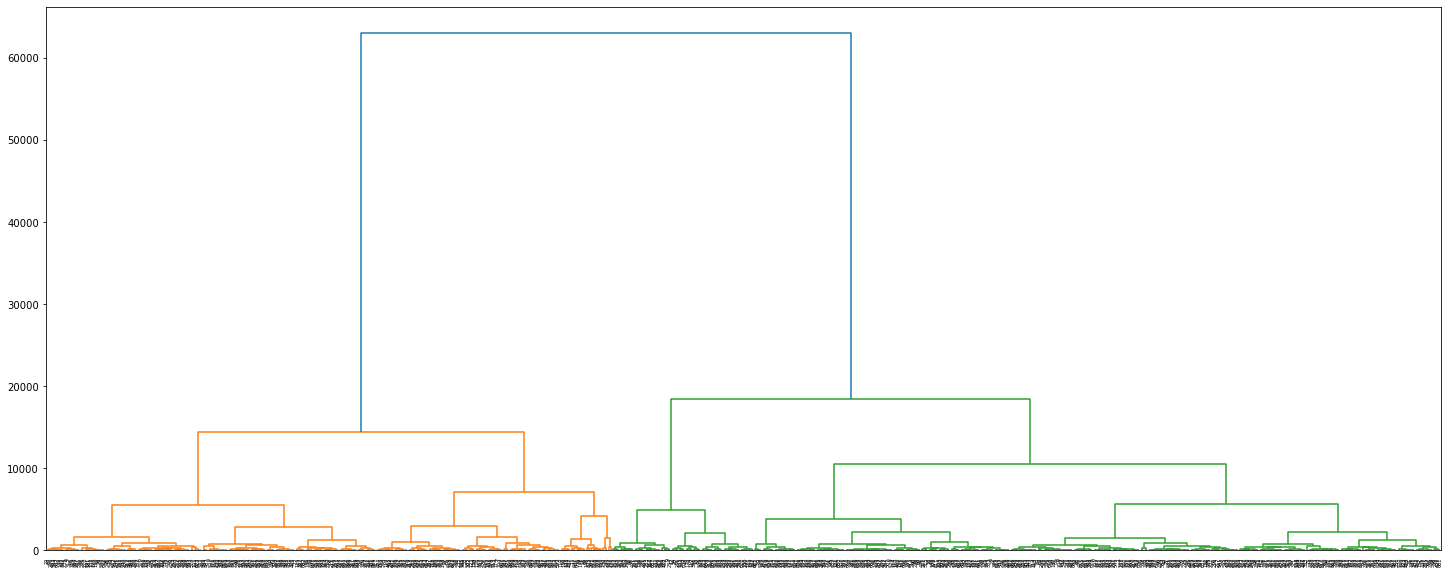

In [6]:
Z = linkage (X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram (Z)

Avaliando o dendograma, percebe-se que a maior linha vertical (azul) que, se cortada por um eixo horizontal, demonstra que 2 cluster são a quantidade ideal para fazer o agrupamento dos dados.

### Normalização dos dados <a id="22"></a>

Como não foram disponibilizados informações sobre as variáveis, e certamente elas possuem diferentes escalas, decidiu-se normalizar os dados o método do desvio padrão (z-score), do qual cada observação é subtraída pela sua respetiva média e dividida pelo desvio padrão.

In [7]:
sc = StandardScaler()    
X_std = sc.fit_transform(X)

### PCA - Redução de dimensionalidade <a id="23"></a>

O PCA é um pouco sensível a variância inicial dos dados, dessa forma variáves com grande range de valores irião "dominar" em relação às que possuem um range de valores menor, portanto a normalização dos dados era uma etapa necessária.

In [8]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_std)
X_pca.shape

(690, 2)

Verificar a variância explicada é essencial, pois de maneira simplificada, é referente a um valor que informa quão confiável um modelo que descreve um fenômeno observado parece ser.

In [9]:
print(f'Variância explicada (PCA = 2): {pca.explained_variance_ratio_}')

Variância explicada (PCA = 2): [0.72663309 0.2732134 ]


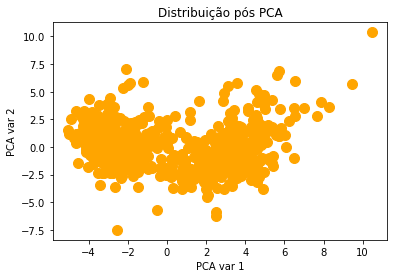

In [10]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], s = 100, c = 'orange')
plt.title('Distribuição pós PCA')
plt.xlabel('PCA var 1')
plt.ylabel('PCA var 2')
plt.show()

Ao aplicar a técnica de redução de dimensionalidade PCA igual a 2, resultado da avaliação do dendograma, verificou-se a distribuição dos dados em um gráfico de dispersão como demonstrado acima.

### HCA <a id="24"></a>

O algoritmo de clusterização HCA, ou Hierarchical Clustering Analysis, possui como vantagens traçar dendrogramas (visualizações de um agrupamento hierárquico binário), o que pode ajudar na interpretação dos resultados. Outra vantagem útil desta abordagem hierárquica é que não precisamos especificar o número de clusters antecipadamente, do qual avalia-se via dendograma.

Parâmetros: 
- n_clusters: Número de cluster a se encontrar
- affinity (distância euclidiana): Métrica para computar o tipo de linkage.
- linkage (complete): O critério de ligação determina qual distância usar entre conjuntos de observação. Complete linkage leva em consideração os pontos mais distante entre os dados para fazer o cluster.

In [11]:
hc = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='complete')
y_hc = hc.fit_predict(X_pca)

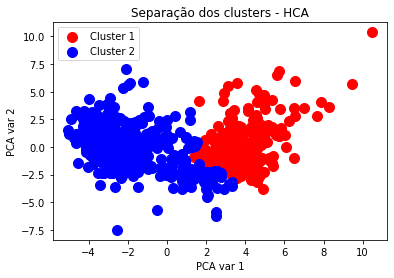

In [12]:
plt.scatter(X_pca[y_hc == 0, 0], X_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_pca[y_hc == 1, 0], X_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.title('Separação dos clusters - HCA')
plt.xlabel('PCA var 1')
plt.ylabel('PCA var 2')

plt.legend()
plt.show()

### DBSCAN <a id="25"></a>

O DBSCAN, ou Espacial Baseado em Densidade de Aplicações com Ruído, é um algoritmo de clusterização que não faz
suposições de clusters esféricos como k-means, nem particiona o conjunto de dados em hierarquias que requerem um ponto de corte manual. Como o próprio nome indica, clusterização baseada em densidade atribui rótulos de cluster com base em regiões densas de pontos. No DBSCAN, a noção de densidade é definida como o número de pontos dentro de um
raio especificado ε.

Parâmetros:
- eps: A distância máxima entre duas amostras para que uma seja considerada na vizinhança da outra.
- min_samples: O número de amostras (ou peso total) em uma vizinhança para que um ponto seja considerado como um ponto central.

In [31]:
db = DBSCAN(eps = 0.5, min_samples = 10, metric = 'euclidean') 
y_db = db.fit_predict(X_pca)

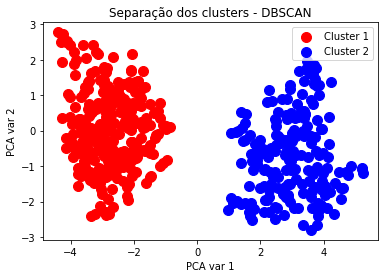

In [32]:
plt.scatter(X_pca[y_db == 0, 0], X_pca[y_db == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_pca[y_db == 1, 0], X_pca[y_db == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.title('Separação dos clusters - DBSCAN')
plt.xlabel('PCA var 1')
plt.ylabel('PCA var 2')

plt.legend()
plt.show()

## Conclusão <a id="3"></a>

Portanto, foram testados alguns métodos de clusterização, o HCA e DBSCAN. Ao avaliar a separação sugerida pelo algoritmo HCA, percebe-se os dados de maneira bastante agrupada ainda, o que talvez possa prejudicar o banco a identificar fraudes. Já em relação ao algoritmo de cluster DBSCAN, percebeu-se uma boa separação dos dados, tornando evidentes dois grupos majoritários. 


Então, se concluí que o algoritmo de **DBSCAN** possui um resultado na entrega de valor superior caso comparado com o algoritmo HCA, ambos para a segmentação das fraudes citadas anteriormente. Dessa forma, o DBSCAN apresenta uma melhor separação dos dados do qual tornará mais simplória a análise feita por parte do banco a fim de identificar transações fraudulentas.

<hr>

@Pivitin's Company™ <br>
Maio, 2022